# Dataset Description

The dataset contains price information of indices, stocks, and commodities.

feedcode = Feed short name

ticker = instrument ticker; e.g. BRT for Brent Spot Indicator

type = 1 = stock

type = 64 = index

type = 1024 = commodity

fullname = Description of the instrument

currency = denomination of the instrument

date = date expressed as DD/MM/YYYY

open = price at the opening of the trading day

high = maximum price achieved during the trading day

low = minimum price achieved during the trading day

last = closing price of the trading day

# Visualisation and Loading

Let's first load the data with Pandas and look at the dataset. The Python Pandas packages helps us work with our datasets.


In [168]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns

import matplotlib.pyplot as plt

dataset = pd.read_csv("daily_data.csv")

Which features are available in the dataset?

In [169]:
print('Columns')
print(dataset.columns.values)
print('\n')

Columns
['feedcode' 'ticker' 'type' 'subtype' 'fullname' 'currency' 'date' 'open'
 'high' 'low' 'last']




Which features are numerical? Which are categorical ? Let's have a look at the head and tail of the data set in order to get a rough idea of what it looks like.

In [170]:
print('First values')
print(dataset.head())
print('\n')
print('Last values')
print(dataset.tail())
print('\n')

First values
  feedcode ticker  type  subtype                  fullname currency  \
0      LSE    TW.     1        0  TAYLOR WIMPEY PLC ORD 1P      GBX   
1      LSE    TW.     1        0  TAYLOR WIMPEY PLC ORD 1P      GBX   
2      LSE    TW.     1        0  TAYLOR WIMPEY PLC ORD 1P      GBX   
3      LSE    TW.     1        0  TAYLOR WIMPEY PLC ORD 1P      GBX   
4      LSE    TW.     1        0  TAYLOR WIMPEY PLC ORD 1P      GBX   

         date   open    high     low   last  
0  02/01/2014  111.3  113.10  111.20  112.9  
1  03/01/2014  112.7  114.50  111.00  114.2  
2  06/01/2014  113.9  116.19  113.50  116.0  
3  07/01/2014  116.2  116.60  114.90  116.4  
4  08/01/2014  117.0  117.30  114.75  115.8  


Last values
       feedcode ticker  type  subtype                   fullname currency  \
189475      LSE    WPG     1        0  WORLDPAY GROUP PLC ORD 3P      GBX   
189476      LSE    WPG     1        0  WORLDPAY GROUP PLC ORD 3P      GBX   
189477      LSE    WPG     1        0  

Let's check the type of variables and get a few statistics for now.

In [171]:
dataset.info()
dataset.describe(include=['O'])
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189480 entries, 0 to 189479
Data columns (total 11 columns):
feedcode    189480 non-null object
ticker      189480 non-null object
type        189480 non-null int64
subtype     189480 non-null int64
fullname    189480 non-null object
currency    162807 non-null object
date        164495 non-null object
open        104603 non-null float64
high        104589 non-null float64
low         104550 non-null float64
last        162615 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 15.9+ MB


,type,subtype,open,high,low,last
count,189480.000000,189480.000000,104603.000000,104589.00000,104550.000000,1.626150e+05
mean,276.846564,0.751916,1971.792204,1988.42056,1954.657368,1.054805e+09
std,432.937804,1.300146,3012.573357,3030.73312,2993.420189,1.437249e+10
min,1.000000,0.000000,13.704000,13.82500,13.620000,1.369200e+01
25%,1.000000,0.000000,426.200000,430.80000,421.200000,4.289055e+02
50%,64.000000,0.000000,1124.000000,1134.75000,1112.000000,1.087000e+03
75%,1024.000000,3.000000,2137.000000,2153.00000,2118.000000,1.983081e+03
max,1024.000000,3.000000,23900.000000,23900.00000,23900.000000,2.373700e+11


As expected, the dates, currency, fullnames, feedcode and ticker are strings (object). Also, some of the values are missings (open, high, low, currency, date and even last) for a part of a dataset.

Finally, let's look at the correlation between the variables.

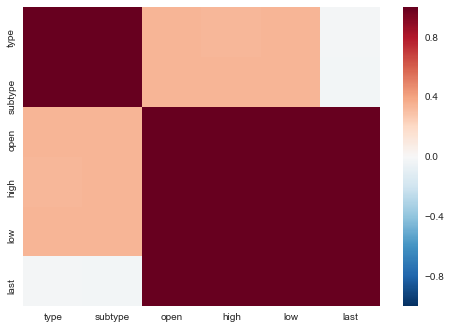

In [172]:
sns.heatmap(dataset.corr())
sns.plt.show()

As expected, the values of the market (open, high, low and last) are highly correlated (remember that at this point, the dataset is not normalised).

# 1 – Can we predict global markets?

**In this task, you will need to classify market states via some unsupervised learning algorithm such as clustering or similar. If you believe that there is other method that is more suitable, feel free to use it instead of clustering.**

**We define market state as days where the global markets behaved similarly.**

**a: For this task, you will need to use the instruments with Type = 64, and Type = 1024. Make sure that you create a subset containing commodities and the MSCI indices’ prices, using only the variable “last” which is the closing price of that day. Moreover, make sure that the prices are aligned to the correct date. For example, you can use the dates as the index of the subset.**


**Answer : **

Let's copy the data set first. We only keep date, type and last when type is 64 or 1024. 

In [173]:
datat=dataset[['date', 'ticker', 'type','last']].query('type == 64 or type==1024')
#We convert date to pandas type
datat['date'] = pd.to_datetime(datat['date'],format="%d/%m/%Y")

Now, we need to have the different tickers as categories and use the dates as index. This is done by creating a pivot table, using date as index, ticker as colums and having last as values.

In [174]:
d=datat.pivot_table(index='date', columns='ticker', values='last')
d=d.sort_index()
print(d.head())


ticker      105653P   105766P  106233P  106400P  106569P   106570P  123163P  \
date                                                                          
2014-01-01  792.581  1357.080  318.124  182.407  992.084  1087.120  474.827   
2014-01-02  791.516  1360.672  318.441  180.076  977.850  1077.868  476.745   
2014-01-03  789.571  1360.672  321.172  181.017  982.765  1082.007  473.355   
2014-01-04      NaN       NaN      NaN      NaN      NaN       NaN      NaN   
2014-01-05      NaN       NaN      NaN      NaN      NaN       NaN      NaN   

ticker      127300P  133717P  136634P   ...       PLT  PLTSPOT  SLVSPOT  \
date                                    ...                               
2014-01-01  513.805  402.313  187.858   ...       NaN  1372.25    19.53   
2014-01-02  510.731  413.126  187.018   ...    1387.0  1397.25    20.01   
2014-01-03  504.372  413.126  188.950   ...    1407.0  1404.50    20.13   
2014-01-04      NaN      NaN      NaN   ...       NaN      NaN      NaN

As you can see, by doing this, we made a lot of NaN values appear. If a value is missing, then it means that the market was closed that particular day. We just have to use the previous value to solve the missing data issue.

In [175]:
d.fillna(method='ffill',inplace=True)
d.dropna(how='any',inplace=True)
print(d.head())

ticker      105653P   105766P  106233P  106400P  106569P   106570P  123163P  \
date                                                                          
2014-01-03  789.571  1360.672  321.172  181.017  982.765  1082.007  473.355   
2014-01-04  789.571  1360.672  321.172  181.017  982.765  1082.007  473.355   
2014-01-05  789.571  1360.672  321.172  181.017  982.765  1082.007  473.355   
2014-01-06  771.229  1360.447  322.181  180.837  981.246  1081.017  468.339   
2014-01-07  771.838  1360.447  323.790  182.793  992.960  1089.714  469.223   

ticker      127300P  133717P  136634P   ...       PLT  PLTSPOT  SLVSPOT  \
date                                    ...                               
2014-01-03  504.372  413.126  188.950   ...    1407.0   1404.5   20.130   
2014-01-04  504.372  413.126  188.950   ...    1407.0   1404.5   20.130   
2014-01-05  504.372  413.126  188.950   ...    1407.0   1404.6   20.110   
2014-01-06  499.930  416.184  192.939   ...    1400.0   1413.8   20.175


**b: Calculate the log returns of the instruments. In R this is defined as diff(log(instrument)), and in Python, using Numpy, np.diff(np.log(instrument)).**


**Answer : **


Now, we just replace the columns by their log returns.

In [176]:
for column in d:
    d[column]=np.log(d[column]) - np.log(d[column].shift(1))
#We get rid of the first row which contains only NaN values
print('\n')
d.dropna(how='all',inplace=True)
print(d.head())



ticker       105653P   105766P   106233P   106400P   106569P   106570P  \
date                                                                     
2014-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-01-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-01-06 -0.023504 -0.000165  0.003137 -0.000995 -0.001547 -0.000915   
2014-01-07  0.000789  0.000000  0.004982  0.010758  0.011867  0.008013   
2014-01-08 -0.003671  0.007412 -0.001249  0.001471  0.000505 -0.000880   

ticker       123163P   127300P   133717P   136634P    ...          PLT  \
date                                                  ...                
2014-01-04  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
2014-01-05  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
2014-01-06 -0.010653 -0.008846  0.007375  0.020892    ...    -0.004988   
2014-01-07  0.001886 -0.005196 -0.024393  0.034322    ...     0.006408   
2014-01-08 -0.004184  0.006196  0.0


**c: Split the new dataset in 85% for training, and 15% for testing.**


**Answer :**


We just have to use the train_test_split function from sklearn.

In [177]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(d, test_size = 0.15)


**d: Run a clustering or other unsupervised learning algorithm of your choice to infer the market states. Find the optimal number of clusters/centroids/classes: you can use X-means clustering or complement your algorithms with some Information Criterion such as Akaike or the Bayesian. If you cannot find the optimal number of clusters, use some number you can justify.**


**Answer :**


Let's try to use BIC in order to find the optimal number of clusters.

In [178]:
import numpy as np

import scipy.spatial as ss

def bic(kmeans,X):
    
    # centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #Variance for clusters
    cl_var = (1.0 / (N - m) / d) * sum([sum(ss.distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)



Now, let's run XMeans using BIC.

We are testing k in range [1,500], so the execution might take a while. We need to get the value of k (i.e. number of clusters) that correponds to the minimum of BIC.

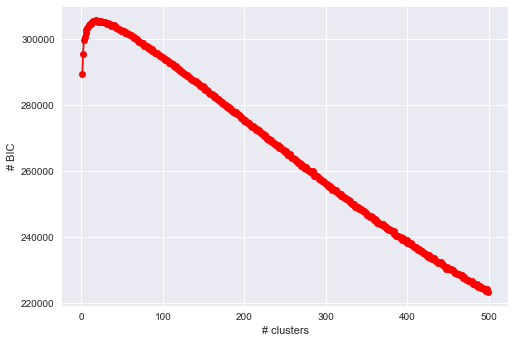

In [179]:
from sklearn.cluster import KMeans

X=train.as_matrix()

KMeansTab = [KMeans(n_clusters = i, init="k-means++").fit(X) for i in range(1,500)]

BIC = [bic(kmeansi,X) for kmeansi in KMeansTab]

plt.plot(range(1,500),BIC,'r-o')
plt.xlabel("# clusters")
plt.ylabel("# BIC")
plt.show()

In [181]:
min_value = min(BIC)
min_index = BIC.index(min_value)
print("MIN BIC : " + str(min_value))
print("Value of K : " + str(min_index+1))

MIN BIC : 223385.374408
Value of K : 499


Thus, we get the optimal number of clusters using BIC criterion. I got **K=499**. However, it's a bit too large so we'll just use K=350 and see if we get good results.

Now, let's add the Market States column to the data.

In [190]:
from sklearn.cluster import KMeans
t=d.as_matrix()
k2 = KMeans(n_clusters=350, init="k-means++").fit(t)
d['Market States'] = k2.labels_
print(d.head())

ticker       105653P   105766P   106233P   106400P   106569P   106570P  \
date                                                                     
2014-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-01-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-01-06 -0.023504 -0.000165  0.003137 -0.000995 -0.001547 -0.000915   
2014-01-07  0.000789  0.000000  0.004982  0.010758  0.011867  0.008013   
2014-01-08 -0.003671  0.007412 -0.001249  0.001471  0.000505 -0.000880   

ticker       123163P   127300P   133717P   136634P      ...         PLTSPOT  \
date                                                    ...                   
2014-01-04  0.000000  0.000000  0.000000  0.000000      ...        0.000000   
2014-01-05  0.000000  0.000000  0.000000  0.000000      ...        0.000071   
2014-01-06 -0.010653 -0.008846  0.007375  0.020892      ...        0.006529   
2014-01-07  0.001886 -0.005196 -0.024393  0.034322      ...       -0.001345   
2014-01

Now, we have the market states column added to the data. If we want to look at a cluster (let's say 54), we run :

In [191]:
d.loc[d['Market States']==54]

ticker,105653P,105766P,106233P,106400P,106569P,106570P,123163P,127300P,133717P,136634P,...,PLTSPOT,SLVSPOT,SN3M,SNC,URAXP,URAXPD,WTI,ZS3M,ZSC,Market States
date,,,,,,,,,,,,,,,,,,,,,
2014-01-16,-0.004069,-0.009655,-0.003774,-0.003133,-0.003919,-0.001270,-0.002312,-0.002846,0.019547,0.010117,...,0.001469,-0.005115,0.002911,0.013483,0.014515,0.015571,-0.002442,-0.005055,0.013540,54
2014-07-01,0.004015,0.000000,0.006414,0.008185,0.008376,0.008025,0.003849,0.000589,0.020504,-0.000369,...,0.012137,-0.000095,0.000705,0.031527,0.027084,0.026253,-0.001139,-0.014770,0.000000,54
2014-11-06,-0.005647,-0.009802,0.000783,0.003291,0.003283,0.002383,-0.006213,-0.006052,-0.002642,0.020498,...,-0.009824,-0.000780,0.015171,0.000000,0.016463,0.009348,-0.012767,-0.001908,-0.000225,54
2014-11-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.007284,-0.004510,0.000000,0.000000,0.016822,0.021032,0.002799,0.000000,0.000000,54
2014-11-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.003913,-0.002951,0.000000,0.000000,0.025657,0.029492,-0.004487,0.000000,0.000000,54
2015-05-13,-0.008375,-0.013898,0.007552,-0.003660,-0.004645,-0.001241,0.001837,-0.003456,0.003892,-0.010588,...,0.011497,0.035018,-0.006309,-0.009449,0.011511,0.022944,-0.018467,-0.006608,0.009298,54
2016-01-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002034,0.002921,0.000000,0.000000,0.024846,0.018647,0.004338,0.000000,0.000000,54
2016-02-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.001670,-0.002546,0.000000,0.000000,0.017938,0.016011,-0.000344,0.000000,0.000000,54
2016-05-17,-0.002675,0.014535,0.002924,-0.004304,-0.004601,-0.002079,0.000071,0.004104,0.003245,0.015394,...,0.001558,0.004883,0.001768,0.000000,0.016403,0.016244,0.012051,0.001053,-0.016905,54



**e.   With the array of Market States (the result from the previous point) calculate the transition probabilities. You can use a simple frequentist approach, i.e. 50% of the time, State “1” was followed by State “5”, since of the 100 occurrences of State “1” , 50 times it was followed by state “5”, and so on for the remaining probabilities.**


**Answer** : 

We will save all the transition probabilities into a transition matrix, where mij is probability of transition from state i to j.

In [193]:
i=-2
z=[0 for x in range(350)]
Ma=[[0 for x in range(350)] for y in range(350)] 
for index, row in d.iterrows(): # We iterate over the market states row
    j=row["Market States"]
    if (i != -2):
        Ma[int(i)][int(j)]+=1 # We add a transition from i to j
        z[int(i)]+=1 #We count the number  of transitions from i to normalise after
    i=j
for k in range(len(Ma)):
    if(z[k]!=0):
        h=[t/z[k] for t in Ma[k]] #We normalise the transitions so they become probabilities
        Ma[k]=h
print(Ma)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0


**f:    Pick two of the clusters that you discover and describe them in a graphical way, for example a bar chart. Since the number of instruments is quite large, feel free to pick only 10.**

**Make sure that the numbers that you display in the bar chart are the averages. E.g. On State “1”, MSCI Estonia returns on average 1%.**

**Moreover, report on which dates this “market state” occurred.**


**Answer :**


Let's study market states 17 and 333.

In [199]:
c1=d.loc[d['Market States']==17]
c2=d.loc[d['Market States']==333]

print(c1)
print(c2)

ticker       105653P   105766P   106233P   106400P   106569P   106570P  \
date                                                                     
2014-03-31  0.021634 -0.053903  0.007011 -0.000507 -0.001431  0.000721   
2014-04-17  0.006156 -0.000801  0.008829  0.005136  0.005004  0.004760   
2014-05-23  0.006047  0.000000  0.003965  0.004670  0.004581  0.002066   
2015-04-24  0.009297  0.000000  0.004572  0.005109  0.005083  0.002885   
2015-11-02  0.017152 -0.002751  0.006358  0.005467  0.005513  0.002792   
2016-06-21  0.001313  0.015789 -0.000027  0.005457  0.006636  0.005383   
2017-04-25  0.011987  0.000000  0.005794  0.002176  0.002076  0.003257   

ticker       123163P   127300P   133717P   136634P      ...         PLTSPOT  \
date                                                    ...                   
2014-03-31  0.005712  0.009994  0.008573 -0.002722      ...        0.003186   
2014-04-17  0.010672  0.009618  0.003003  0.007702      ...       -0.021222   
2014-05-23  0.004

Market state 17 appeared on 2014-03-31. Market state 333 appeared on 2014-08-13.

As suggested, let's keep only 10 instruments, let's say the first ten.

In [200]:
c1 = c1.ix[:,0:10]
c2= c2.ix[:,0:10]

print(c1)

ticker       105653P   105766P   106233P   106400P   106569P   106570P  \
date                                                                     
2014-03-31  0.021634 -0.053903  0.007011 -0.000507 -0.001431  0.000721   
2014-04-17  0.006156 -0.000801  0.008829  0.005136  0.005004  0.004760   
2014-05-23  0.006047  0.000000  0.003965  0.004670  0.004581  0.002066   
2015-04-24  0.009297  0.000000  0.004572  0.005109  0.005083  0.002885   
2015-11-02  0.017152 -0.002751  0.006358  0.005467  0.005513  0.002792   
2016-06-21  0.001313  0.015789 -0.000027  0.005457  0.006636  0.005383   
2017-04-25  0.011987  0.000000  0.005794  0.002176  0.002076  0.003257   

ticker       123163P   127300P   133717P   136634P  
date                                                
2014-03-31  0.005712  0.009994  0.008573 -0.002722  
2014-04-17  0.010672  0.009618  0.003003  0.007702  
2014-05-23  0.004646  0.002344  0.000000 -0.001695  
2015-04-24  0.008140  0.001788  0.000000 -0.033998  
2015-11-02  0.0

C:\Users\aimenlou\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
C:\Users\aimenlou\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


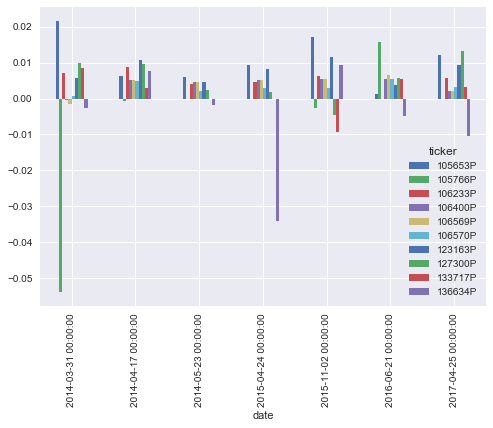

In [202]:
c1.plot.bar()
plt.show()

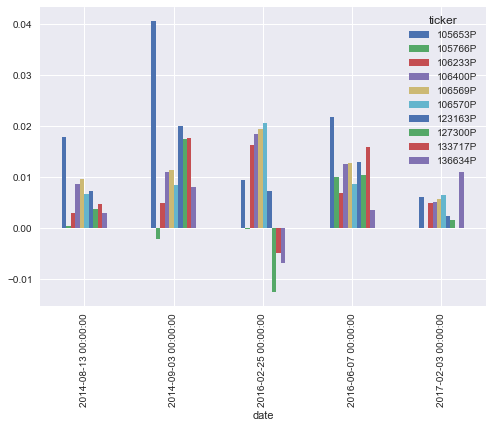

In [203]:
c2.plot.bar()
plt.show()

As you can see, the clusters work very well for this value of K. The thing is that we have a lot of states (350) and they do not contain a lot of dates, so this choice might not be perfect (some clusters contain only one date for example).

Let's say we want to build an investement strategy. If we're in state i today, then we need to find the state j for which the transition probability between i and j is the highest. Then, it's very likely that we will be at state j tomorrow, and we can use it as a way to invest. A good approach would also be to use an HMM to infer the transition probabilites, rather than a frequentist approach.


# 2- Factor model


**In this task, we will perform a Principal Component Analysis to identify statistical factors using the stocks of the London Stock Exchange.**


**a: For this task use the instruments with Type = 1 . Make sure you normalise the data! E.g. take the log returns, or whatever you see fit.**


**Answer :**


Let's go back to the original dataframe and filter it with type = 1.

In [204]:
datat=dataset[['date', 'ticker', 'type','last']].query('type == 1')
#We convert date to pandas type
datat['date'] = pd.to_datetime(datat['date'],format="%d/%m/%Y")
print(datat.head())


        date ticker  type   last
0 2014-01-02    TW.     1  112.9
1 2014-01-03    TW.     1  114.2
2 2014-01-06    TW.     1  116.0
3 2014-01-07    TW.     1  116.4
4 2014-01-08    TW.     1  115.8


Now, we have to normalise the data, let's take the log returns just as we did on part 1. 

In [205]:
d=datat.pivot_table(index='date', columns='ticker', values='last')
d=d.sort_index()
d.interpolate(inplace=True)
for column in d:
    d[column]=np.log(d[column]) - np.log(d[column].shift(1))
#We get rid of the first row which contains only NaN values
print('\n')
d.fillna(method='ffill',inplace=True)
print(d.head())
print(d.tail())



ticker           AAL       ABF       ADM       AHT      ANTO       AV.  \
date                                                                     
2014-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03  0.003862  0.014366  0.000766 -0.008974 -0.001217 -0.002930   
2014-01-06 -0.017108  0.004743  0.011420  0.017236 -0.042295  0.000000   
2014-01-07  0.001176 -0.001184  0.008293  0.017566 -0.008294  0.024968   

ticker           AZN       BA.       BAB      BARC    ...         TSCO  TUI  \
date                                                  ...                     
2014-01-01       NaN       NaN       NaN       NaN    ...          NaN  NaN   
2014-01-02       NaN       NaN       NaN       NaN    ...          NaN  NaN   
2014-01-03  0.007699  0.003941  0.007305  0.006619    ...     0.001363  NaN   
2014-01-06  0.003619 -0.001389  0.005082  0.016899    ...     0.003418  NaN   
2014-

We have many columns filled with NaN. Let's first use the data from previous data just as before. Then, I will keep the columns with less than 50% of NaN values. Then we remove the remaining NaN values. This is a crucial step, as we cannot apply PCA on a data set containing NaN values.

In [207]:
d = d.loc[:, d.isnull().mean() < .5]
d.dropna(how='any',inplace=True)
print(d.head())
print(d.tail())

ticker           AAL       ABF       ADM       AHT      ANTO       AV.  \
date                                                                     
2014-12-18  0.008606  0.029476  0.041769  0.021960  0.007597  0.026781   
2014-12-19  0.022035  0.019283 -0.008368  0.006926  0.030737  0.029522   
2014-12-22 -0.016480  0.007175  0.022660  0.013711 -0.008092 -0.005469   
2014-12-23  0.006794 -0.002178  0.005214 -0.005119  0.009434  0.001624   
2014-12-24  0.000423  0.005282 -0.007457 -0.000856  0.000000  0.003442   

ticker           AZN       BA.       BAB      BARC    ...          SVT  \
date                                                  ...                
2014-12-18  0.027381  0.026095  0.010143  0.028524    ...     0.023093   
2014-12-19 -0.001642  0.001514 -0.003486  0.012701    ...     0.000496   
2014-12-22  0.007225  0.018416  0.013183  0.014386    ...     0.010854   
2014-12-23 -0.017906  0.004235  0.001869  0.007872    ...     0.000981   
2014-12-24  0.008598  0.001689 -0.000


**b: Fit a principal component analysis on the variable “last”**


**Answer :**


Now that we have taken the log-returns to normalise the data and got rid of the NaN values, we can apply PCA properly.

In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X=d)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Let's have a look at the explained variance ratio, and print the top 3 components.

In [209]:
var= pca.explained_variance_ratio_
print(var)
p=pca.components_

[ 0.35013542  0.19467781  0.12244667]



**d: Report which stocks belong to each component**


**Answer :**


Now that we have the components, we have to get which stocks belong to each components. I choose to keep the top 5 stocks of each component, and print them.

In [210]:
stocks = list(d) #Gets the column names = stocks
import heapq
h1=heapq.nlargest(5, range(len(p[0])), p[0].__getitem__)
print("Five top stocks of component one :")
for i in range(5):
    print(stocks[h1[i]]+" ")
print("\n")
h2=heapq.nlargest(5, range(len(p[1])), p[1].__getitem__)
print("Five top stocks of component two :")
for i in range(5):
    print(stocks[h2[i]]+" ")
print("\n")
h3=heapq.nlargest(5, range(len(p[2])), p[2].__getitem__)
print("Five top stocks of component three :")

for i in range(5):
    print(stocks[h3[i]]+" ")

Five top stocks of component one :
SKG 
LSE 
LGEN 
PRU 
HL. 


Five top stocks of component two :
HSBA 
BARC 
BDEV 
STAN 
SL. 


Five top stocks of component three :
HSBA 
SKG 
RRS 
WPP 
NG. 


Thus, we get the stocks that have the most influence on the variable last (i.e. which account for the most variation).